<a href="https://colab.research.google.com/github/GrTravis2/AgAid_Hackathon_25/blob/isabella/AgAID_Hackathon_25_Team_13_Crop_Residue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:

import pandas as pd
import os
import cv2
import numpy as np
import  sklearn
# hi :)


# # New Section
#
#
image=cv2.imread('IMG_0638_part16.jpg')

print(image.shape)



for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    pix_val=image[y,x]
    #print(f"Pixel at  {x},{y}={pix_val}")

image_res=cv2.imread('IMG_0638_res_part16.tif')

print(image_res.shape)
count=0
count_arr=[]
pix=0
for y in range(image_res.shape[0]):
  for x in range(image_res.shape[1]):
    pix_val_res=image_res[y,x]
    pix=pix+1
    if np.array_equal(pix_val_res, [0,0,0]):
      count=count+1

print(pix)
print(count)

print(count/pix)



(512, 512, 3)
(512, 512, 3)
262144
33394
0.12738800048828125


In [ ]:
# prompt: i want an array of all the pixels rgb values at the same xy as image_res[y,x] that rbg is equal too 0 as well as the x and y of the pixels

import pandas as pd
import os
import cv2
import numpy as np
import  sklearn

image=cv2.imread('IMG_0638_part16.jpg')
print(image.shape)

image_res=cv2.imread('IMG_0638_res_part16.tif')
print(image_res.shape)

# Initialize an empty list to store the results
black_pixel_data = []

for y in range(image_res.shape[0]):
  for x in range(image_res.shape[1]):
    pix_val_res = image_res[y,x]
    if np.array_equal(pix_val_res, [0,0,0]):
      # Append the RGB value, x, and y to the list
      black_pixel_data.append({
          'rgb': pix_val_res.tolist(),
          'x': x,
          'y': y
      })

# Now black_pixel_data contains a list of dictionaries, each with the RGB, x, and y
# Convert to DataFrame for easier handling (optional)
df = pd.DataFrame(black_pixel_data)
df



(512, 512, 3)
(512, 512, 3)


AttributeError: 'int' object has no attribute 'val'

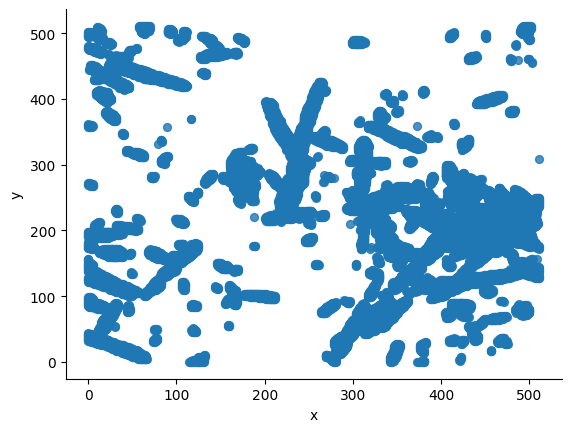

In [ ]:
# @title x vs y

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
mage=cv2.imread('IMG_0638_part01.jpg')

print(image.shape)



for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    pix_val=image[y,x]
    print(f"Pixel at  {x},{y}={pix_val}")

image_res=cv2.imread('IMG_0638_res_part01.tif')

print(image_res.shape)
count=0
count_arr=[]
pix=0
for y in range(image_res.shape[0]):
  for x in range(image_res.shape[1]):
    pix_val_res=image_res[y,x]
    pix=pix+1
    if np.array_equal(pix_val_res, [0,0,0]):
      count=count+1
      count_arr.append(pix_val)
print(pix)
print(count)

print(count/pix)
print(count_arr)

Streaming output truncated to the last 5000 lines.
Pixel at  125,502=[143 154 158]
Pixel at  126,502=[137 148 152]
Pixel at  127,502=[145 156 160]
Pixel at  128,502=[158 167 171]
Pixel at  129,502=[144 150 155]
Pixel at  130,502=[125 131 136]
Pixel at  131,502=[145 151 156]
Pixel at  132,502=[156 162 167]
Pixel at  133,502=[150 156 161]
Pixel at  134,502=[111 117 122]
Pixel at  135,502=[106 112 117]
Pixel at  136,502=[125 131 136]
Pixel at  137,502=[145 151 156]
Pixel at  138,502=[144 150 155]
Pixel at  139,502=[152 158 163]
Pixel at  140,502=[154 163 167]
Pixel at  141,502=[137 146 150]
Pixel at  142,502=[ 99 108 112]
Pixel at  143,502=[107 116 120]
Pixel at  144,502=[128 137 141]
Pixel at  145,502=[147 156 160]
Pixel at  146,502=[144 153 157]
Pixel at  147,502=[128 137 141]
Pixel at  148,502=[114 123 127]
Pixel at  149,502=[127 136 140]
Pixel at  150,502=[146 155 159]
Pixel at  151,502=[129 138 142]
Pixel at  152,502=[108 117 121]
Pixel at  153,502=[79 88 92]
Pixel at  154,502=[74 80

In [ ]:
mage=cv2.imread('IMG_0898_part16.jpg')

print(image.shape)



for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    pix_val=image[y,x]
    #print(f"Pixel at  {x},{y}={pix_val}")

image_res=cv2.imread('IMG_0898_res_part16.tif')

print(image_res.shape)
count=0
count_arr=[]
pix=0
for y in range(image_res.shape[0]):
  for x in range(image_res.shape[1]):
    pix_val_res=image_res[y,x]
    pix=pix+1
    if np.array_equal(pix_val_res, [255,255,255]):
      count=count+1
print(pix)
print(count)

print(count/pix)


(512, 512, 3)
(512, 512, 3)
262144
28882
0.11017608642578125
[]
